In [27]:
import numpy as np

import matplotlib.pylab as plt

import tensorflow as tf

import os

import pandas as pd



print("\u2022 Using TensorFlow Version:", tf.__version__)

print('\u2022 GPU Device Found.' if tf.test.is_gpu_available() else '\u2022 GPU Device Not Found. Running on CPU')

• Using TensorFlow Version: 2.16.1
• GPU Device Found.


In [28]:
# #Downloading the dataset

# !pip install roboflow



# from roboflow import Roboflow

# rf = Roboflow(api_key="ktEA0afZ4lLGdpzjcDnI")

# project = rf.workspace("parin-kittipongdaja-vwmn3").project("skin-problem-multilabel")

# version = project.version(1)

# dataset = version.download("multiclass")


In [29]:
pre_trained_model = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3),

                                               include_top=False,

                                               weights='imagenet')



pre_trained_model.trainable = False

In [30]:
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [31]:
# for i, layer in enumerate(model.layers):
#     print(f"{i}: {layer.name}")

In [32]:
len(pre_trained_model.layers)

311

In [33]:
last_layer = pre_trained_model.get_layer('mixed10')

print('last layer output shape: ', last_layer.output.shape)

last_output = last_layer.output

last layer output shape:  (None, 5, 5, 2048)


In [34]:
from tensorflow.keras import layers, models, Model

from tensorflow.keras.optimizers import Adam



# Flatten the output layer from the pre-trained model

x = layers.Flatten()(last_output) 



# Add a fully connected layer with 1,024 hidden units and ReLU activation

x = layers.Dense(1024, activation='relu')(x)




# Add a dropout layer with a dropout rate of 0.2 to prevent overfitting

x = layers.Dropout(0.5)(x)



# Add a final sigmoid layer for multilabel classification

# The number of units should match the number of labels in your dataset

x = layers.Dense(10, activation='sigmoid')(x) 



# Create the model with the pre-trained model input and your custom top layers

model = Model(inputs=pre_trained_model.input, outputs=x)



# Compile the model with a suitable optimizer and loss function

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 74,242,858 (283.21 MB)

 Trainable params: 52,440,074 (200.04 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [36]:
# data_dir = '/content/Skin-Problem-MultiLabel-1'

In [37]:
Training_Dir = '/kaggle/input/skin-problem-multilabel-v1i-multiclass/train'

Validation_Dir = '/kaggle/input/skin-problem-multilabel-v1i-multiclass/valid'

Testing_Dir = '/kaggle/input/skin-problem-multilabel-v1i-multiclass/test'

In [38]:
# Fungsi untuk memuat dataset dari direktori dengan file _classes.csv untuk multilabel

def load_multilabel_dataset(data_dir, image_size=(224, 224, 3), batch_size=32):

    # Path ke file CSV

    classes_path = os.path.join(data_dir, '_classes.csv')



    # Baca file CSV

    df = pd.read_csv(classes_path)

    df['filename'] = df['filename'].apply(lambda x: os.path.join(data_dir, x))  # Sesuaikan path file gambar



    # Mengambil paths dan labels dalam bentuk multilabel

    image_paths = df['filename'].values

    labels = df.iloc[:, 1:].values  # Mengambil kolom kelas saja (dari kolom kedua hingga akhir)



    # Membuat tf.data.Dataset dari paths dan labels

    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))



    # Memproses gambar dan label

    dataset = dataset.map(lambda x, y: process_image(x, y, image_size), num_parallel_calls=tf.data.AUTOTUNE)



    # Batch dan prefetch untuk performa

    dataset = dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)



    return dataset



# Fungsi untuk memproses setiap path gambar dan label

def process_image(file_path, label, image_size):

    # Load gambar

    image = tf.io.read_file(file_path)

    image = tf.image.decode_jpeg(image, channels=3)

    image = tf.image.resize(image, image_size)

    image = image / 255.0  # Normalisasi ke [0, 1]



    return image, label





In [39]:
train_dataset = load_multilabel_dataset(Training_Dir, image_size=(224, 224), batch_size=32)

val_dataset = load_multilabel_dataset(Validation_Dir, image_size=(224, 224), batch_size=32)

test_dataset = load_multilabel_dataset(Testing_Dir, image_size=(224, 224), batch_size=32)



for images, labels in train_dataset.take(1):

    print("Image batch shape:", images.shape)

    print("Label batch shape:", labels.shape)

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32, 10)


In [40]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        '''
        Halts the training when the loss falls below 0.4

        Args:
            epoch (integer) - index of epoch (required but unused in the function definition below)
            logs (dict) - metric results from the training epoch
        '''

        # Check the loss
        if logs['accuracy'] >= 0.85 and logs['val_accuracy'] >= 0.85:

            # Stop if threshold is met
            print("\nAccuracy 85% so stopping training!")
            self.model.stop_training = True

In [41]:
history = model.fit(train_dataset,
                    validation_data = val_dataset,
                    epochs = 30,
                    callbacks=[myCallback()])

Epoch 1/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 33s 191ms/step - accuracy: 0.5912 - loss: 2.9072 - val_accuracy: 0.7503 - val_loss: 0.1759
Epoch 2/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.7528 - loss: 0.1878 - val_accuracy: 0.7833 - val_loss: 0.1504
Epoch 3/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.7993 - loss: 0.1422 - val_accuracy: 0.7781 - val_loss: 0.1570
Epoch 4/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.8371 - loss: 0.1298 - val_accuracy: 0.7802 - val_loss: 0.1480
Epoch 5/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.8449 - loss: 0.1129 - val_accuracy: 0.8101 - val_loss: 0.1370
Epoch 6/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.8615 - loss: 0.1024 - val_accuracy: 0.7977 - val_loss: 0.1479
Epoch 7/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.8658 - loss: 0.0956 - val_accuracy: 0.7895 - val_loss: 0.1650
Epoch 8/30
106/106 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.8755 - loss: 0.0936 - val_ac

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


    
# Simpan model dengan performa terbaik

checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_loss", mode="min", verbose=1)



# Stop Training jika tidak ada peningkatan

early_stop = EarlyStopping(monitor="val_loss", patience=3, verbose=2, restore_best_weights=True)



history = model.fit(

    train_dataset,

    validation_data=val_dataset,

    epochs=15,

    batch_size=32,

    callbacks=[checkpoint, early_stop],

    verbose=2

)


In [42]:
test_loss, test_acc = model.evaluate(test_dataset)  # test_dataset adalah dataset pengujian

print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 201ms/step - accuracy: 0.8295 - loss: 0.1685
Test Loss: 0.153563991189003, Test Accuracy: 0.8461538553237915


In [43]:
from tensorflow.keras.preprocessing import image



# Fungsi untuk memuat dan memproses gambar

def load_and_process_image(img_path, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)  # Memuat gambar dan mengubah ukurannya

    img_array = image.img_to_array(img)  # Mengonversi gambar ke array

    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch (1, height, width, channels)

    img_array = img_array / 255.0  # Normalisasi gambar (dari 0-255 ke 0-1)

    return img_array



# Memuat dan memproses gambar

img_path = '/kaggle/input/skin-problem-multilabel-v1i-multiclass/test/71_jpg.rf.9471d19b6941948e1025e8d71eb45a16.jpg'

img_array = load_and_process_image(img_path)



# Prediksi menggunakan model

predictions = model.predict(img_array)



# Menentukan label yang diprediksi berdasarkan ambang batas 0.5 untuk multilabel

predicted_labels = (predictions > 0.5).astype(int)



# Menampilkan hasil prediksi

print(predicted_labels)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[1 0 0 0 0 0 0 0 0 0]]


In [66]:
from tensorflow.keras.preprocessing import image



# Fungsi untuk memuat dan memproses gambar

def load_and_process_image(img_path, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)  # Memuat gambar dan mengubah ukurannya

    img_array = image.img_to_array(img)  # Mengonversi gambar ke array

    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch (1, height, width, channels)

    img_array = img_array / 255.0  # Normalisasi gambar (dari 0-255 ke 0-1)

    return img_array



# Daftar label yang sesuai dengan output model (sesuaikan dengan 10 kelas Anda)

labels = [

    "Acne", "Blackheads", "Dark Spots", "Dry Skin",

    "Eye Bags", "Normal Skin", "Oily Skin", "Pores",

    "Redness", "Wrinkles"

]



# Memuat dan memproses gambar

# img_path = '/kaggle/input/test-aja-bang-dermata1/dryskin3.jpeg'
# img_path = '/kaggle/input/test-aja-bang-dermata1/dryskin2.jpeg'
# img_path = '/kaggle/input/test-aja-bang-dermata1/test_oily.jpeg'
# img_path = '/kaggle/input/test-aja-bang-dermata1/test_acne.jpeg'
# img_path = '/kaggle/input/test-aja-bang-dermata1/WIN_20241113_01_53_43_Pro.jpg'
# img_path = '/kaggle/input/test-aja-bang-dermata1/eye_bags.jpeg'
# img_path = '/kaggle/input/test-aja-bang-dermata1/milia.jpeg'
# img_path = '/kaggle/input/skin-problem-multilabel-v1i-multiclass/test/336_jpg.rf.aa6d95791751b35a7a9a729887da5a6d.jpg' #wrinkles
# img_path = '/kaggle/input/skin-problem-multilabel-v1i-multiclass/test/35-Male-South-Korean-Yong-Gyu-Park_jpg.rf.140a14575fcf07c688cef3f8cd65c7ff.jpg' #normal
# img_path = '/kaggle/input/skin-problem-multilabel-v1i-multiclass/test/4aa87886-36bf-445b-a3ab-322154f758a3_jpg.rf.caf992586f844a37c5f20f2ce9bda7c7.jpg'


img_array = load_and_process_image(img_path)



# Prediksi menggunakan model

predictions = model.predict(img_array)



# Menentukan label yang diprediksi berdasarkan ambang batas 0.5 untuk multilabel

predicted_labels = (predictions > 0.01).astype(int)



# Menggabungkan label yang diprediksi dengan koma

predicted_diagnosis = [labels[i] for i in range(len(labels)) if predicted_labels[0][i] == 1]



# Menampilkan hasil dalam format yang diinginkan

if predicted_diagnosis:

    print("Anda didiagnosis:", ", ".join(predicted_diagnosis))

else:

    print("Tidak ada masalah kulit yang terdeteksi.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Anda didiagnosis: Wrinkles


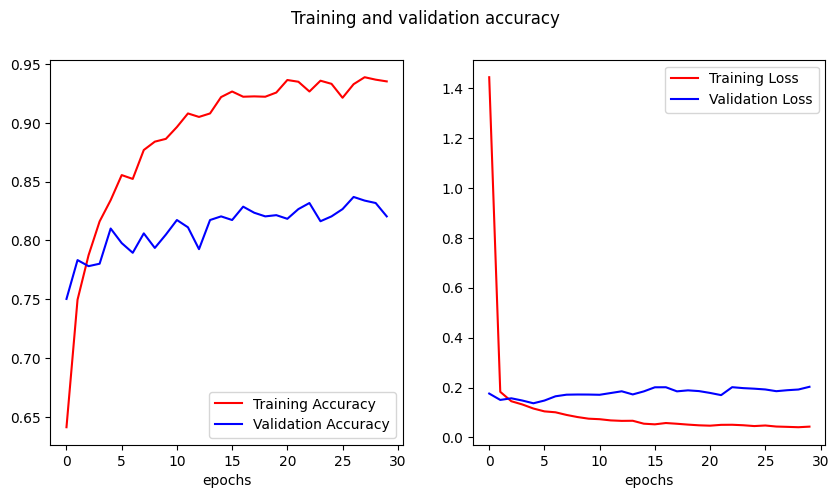

In [67]:
# Get training and validation accuracies

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']



# Get number of epochs

epochs = range(len(acc))



fig, ax = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle('Training and validation accuracy')



for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):

    ax[i].plot(epochs, data[0], 'r', label="Training " + label)

    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)

    ax[i].legend()

    ax[i].set_xlabel('epochs')



plt.show()

In [ ]:
# import gc

# from tensorflow.keras import backend as K



# # Hapus model yang tidak terpakai

# del model  # Hapus objek model



# # Hapus objek lain yang sudah tidak terpakai, seperti history atau variabel training lainnya

# del history



# # Clear session untuk melepaskan memori

# K.clear_session()



# # Panggil garbage collector untuk membersihkan memori

# gc.collect()


In [68]:
# Save the entire model
#use dermata_*    *name of your pretrained model, exaample: dermata_inceptionV3

model.save('draft_dermata_inceptionV3.keras')  # Add .keras extension to the filepath

In [ ]:
DERMATA_MODEL = "/kaggle/working/draft_dermata_inceptionV3.keras"

In [ ]:
tf.saved_model.save(model, DERMATA_MODEL)

In [ ]:
%%bash -s $DERMATA_MODEL

saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

In [ ]:
loaded = tf.saved_model.load(DERMATA_MODEL)

In [ ]:
print(list(loaded.signatures.keys()))

infer = loaded.signatures["serving_default"]

print(infer.structured_input_signature)

print(infer.structured_outputs)

In [ ]:
# convert to tflite

converter = tf.lite.TFLiteConverter.from_saved_model(DERMATA_MODEL)

converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()